### Conditional Frequency Distributions:

In [5]:
import nltk
# Conditional frequency distribution needs to pair each event with a condition

text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]

In [6]:
from nltk.corpus import brown

#cfd = nltk.ConditionalFreqDist(
#    (genre, word)
#    for genre in brown.categories()
#    for word in brown.words(categories=genre))

genre_word = [(genre, word)
             for genre in ['news', 'romance']
             for word in brown.words(categories=genre)]
len(genre_word)

170576

In [7]:
genre_word[:10]

[('news', 'The'),
 ('news', 'Fulton'),
 ('news', 'County'),
 ('news', 'Grand'),
 ('news', 'Jury'),
 ('news', 'said'),
 ('news', 'Friday'),
 ('news', 'an'),
 ('news', 'investigation'),
 ('news', 'of')]

In [8]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()

['news', 'romance']

In [9]:
print(cfd['news'].most_common(20))

[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806), ('that', 802), ('``', 732), ('is', 732), ('was', 717), ("''", 702), ('on', 657), ('at', 598), ('with', 545), ('be', 526), ('by', 497)]


In [10]:
cfd['news']['of']
print(list(cfd['romance'])[:50])

[',', '.', 'the', 'and', 'to', 'a', 'of', '``', "''", 'was', 'I', 'in', 'he', 'had', '?', 'her', 'that', 'it', 'his', 'she', 'with', 'you', 'for', 'at', 'He', 'on', 'him', 'said', '!', '--', 'be', 'as', ';', 'have', 'but', 'not', 'would', 'She', 'The', 'out', 'were', 'up', 'all', 'from', 'could', 'me', 'like', 'been', 'so', 'there']


### Plotting and Tabulating Distributions:

In [11]:
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(10), cumulative=False)

                 0   1   2   3   4   5   6   7   8   9 
       English   0 185 340 358 114 169 117 157 118  80 
German_Deutsch   0 171  92 351 103 177 119  97 103  62 


### Generating Random Text with Bigrams:

In [12]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In [13]:
def generate_model(cfd, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfd[word].max()
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [14]:
cfd['he'].max()

'said'

In [15]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

### Solving word puzzles:

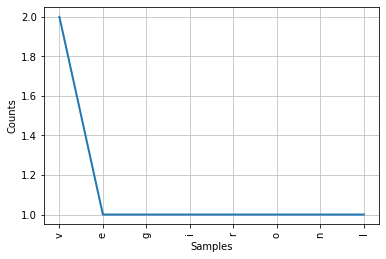

In [16]:
import nltk
import matplotlib.pyplot as plt

puzzle_letters = nltk.FreqDist('egivrvonl')
puzzle_letters.plot()
plt.show()

In [17]:
obligatory = 'r'
wordlist = nltk.corpus.words.words()
puzzle_solution = [w for w in wordlist if len(w) >= 6
                                        and obligatory in w
                                        and nltk.FreqDist(w) <= puzzle_letters]
print(puzzle_solution)

['glover', 'gorlin', 'govern', 'grovel', 'ignore', 'involver', 'lienor', 'linger', 'longer', 'lovering', 'noiler', 'overling', 'region', 'renvoi', 'revolving', 'ringle', 'roving', 'violer', 'virole']


### Name list:

In [18]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [19]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
print([w for w in male_names if w in female_names][:20])

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel']


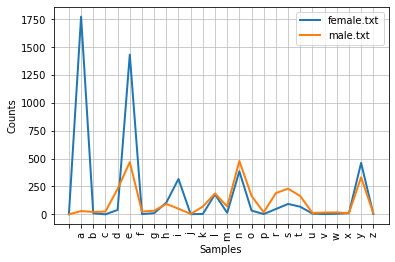

In [20]:
cfd = nltk.ConditionalFreqDist(
            (fileid, name[-1])
            for fileid in names.fileids()
            for name in names.words(fileid))
cfd.plot()
plt.show()

### Pronunciation guide:

In [21]:
# CMU Pronouncing Dictionary  

entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [22]:
# Returning CMUdict entries

for entry in entries[990:1000]:
    print(entry)

('addicted', ['AH0', 'D', 'IH1', 'K', 'T', 'IH0', 'D'])
('addicting', ['AH0', 'D', 'IH1', 'K', 'T', 'IH0', 'NG'])
('addiction', ['AH0', 'D', 'IH1', 'K', 'SH', 'AH0', 'N'])
('addictions', ['AH0', 'D', 'IH1', 'K', 'SH', 'AH0', 'N', 'Z'])
('addictive', ['AH0', 'D', 'IH1', 'K', 'T', 'IH0', 'V'])
('addicts', ['AH0', 'D', 'IH1', 'K', 'T', 'S'])
('addicts', ['AE1', 'D', 'IH2', 'K', 'T', 'S'])
('addidas', ['AH0', 'D', 'IY1', 'D', 'AH0', 'S'])
("addidas'", ['AH0', 'D', 'IY1', 'D', 'AH0', 'S'])
('addidases', ['AH0', 'D', 'IY1', 'D', 'AH0', 'S', 'IH0', 'Z'])


In [23]:
# Finding entries by phone length and individual phonemes

for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron # assigns contents of pron to three new variables
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end = ' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

In [24]:
# Finding entries by phone sequence

syllable = ['N', 'IH0', 'K', 'S']
print([word for word, pron in entries if pron[-4:] == syllable])

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 'un

In [25]:
# Finding entries by letter and phoneme values at fixed positions

print([(word, pron) for word, pron in entries if pron[-1] == 'M' and word[-1] == 'n'])

[('autumn', ['AO1', 'T', 'AH0', 'M']), ('column', ['K', 'AA1', 'L', 'AH0', 'M']), ('condemn', ['K', 'AH0', 'N', 'D', 'EH1', 'M']), ('damn', ['D', 'AE1', 'M']), ('goddamn', ['G', 'AA1', 'D', 'D', 'AE2', 'M']), ('hymn', ['HH', 'IH1', 'M']), ('solemn', ['S', 'AA1', 'L', 'AH0', 'M'])]


In [26]:
# Extracintg stress pattern using nested for loop shorthand

def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()] # whatever is in front of 1st FOR statement
                                                                        # is dded to the list

[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']][:10]

#[x for x, y in entries if stress(y) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated']

In [27]:
# Simplfied inline nested for loop analyis

list_source = ['AB', 'CD']

list_dest = []

for w in list_source:
    for char in w:
        list_dest.append(char)

print(list_dest)        

[char for w in list_source for char in w]

['A', 'B', 'C', 'D']


['A', 'B', 'C', 'D']

In [28]:
# Finding simlar words where changing one phone results in a change in meaning

p3 = [(pron[0]+'-'+pron[2], word)
      for word, pron in entries
      if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + '...')

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In [29]:
# Find a list of individual entries for a specific condition

print(sorted(cfd.conditions()))
word = sorted(cfd['P-L'])
print(word)

['P-AA1', 'P-AH0', 'P-AW1', 'P-AY1', 'P-B', 'P-CH', 'P-D', 'P-ER0', 'P-ER1', 'P-EY1', 'P-F', 'P-G', 'P-IY0', 'P-IY1', 'P-JH', 'P-K', 'P-L', 'P-M', 'P-N', 'P-NG', 'P-OW0', 'P-OW1', 'P-OY1', 'P-P', 'P-R', 'P-S', 'P-SH', 'P-T', 'P-TH', 'P-UW1', 'P-V', 'P-Z']
['pahl', 'pail', 'paille', 'pal', 'pale', 'pall', 'paul', 'paule', 'paull', 'peal', 'peale', 'pearl', 'pearle', 'peel', 'peele', 'pehl', 'peil', 'pell', 'pelle', 'perl', 'perle', 'piehl', 'piel', 'pihl', 'pil', 'pile', 'pill', 'pille', 'poehl', 'pohl', 'pol', 'pole', 'poll', 'pool', 'poole', 'poul', 'puhl', 'pull', 'pyle']


In [30]:
# Find phones (phonemes) for a specific word

[(x, y) for x, y in entries if x == 'pasts'] 

[('pasts', ['P', 'AE1', 'S', 'T', 'S']),
 ('pasts', ['P', 'AE1', 'S', 'S']),
 ('pasts', ['P', 'AE1', 'S'])]

In [31]:
# More efficient method of returning phones (phonemes) for a specific word

prondict = nltk.corpus.cmudict.dict()
prondict['fire']
prondict['blog'] = [['B', 'L', 'AA1', 'G']] # Adding new dict item
prondict['blog']

[['B', 'L', 'AA1', 'G']]

In [32]:
# Extract phonemes for a sequence of words

text = ['natural', 'language', 'processing']
print([ph for w in text for ph in prondict[w][0]])

['N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH', 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']


### Comparative Wordlists:

In [33]:
# Show all available languages

from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [34]:
# Show first ten words in english

print(swadesh.words('en')[:10])

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there']


In [35]:
# Create French ==> English dictionary

fr2en = swadesh.entries(['fr', 'en']) # list of tuples
print(fr2en[:10])

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there')]


In [36]:
# Translate from French

translate = dict(fr2en)
translate['quelques']

'some'

In [37]:
# Add German to dictionary

de2en = swadesh.entries(['de', 'en']) # list of tuples
translate.update(dict(de2en))
translate['ich']

'I'

In [38]:
# Comparing words in various Germanic and Romance languages

languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [120, 11, 143]:
    print(swadesh.entries(languages)[i]) # check how to add language code next to each word

('walk', 'gehen', 'lopen, stappen', 'caminar', 'marcher', 'andar, caminhar, passear', 'gradi')
('what', 'was', 'wat', 'que', 'quoi', 'que, o que', 'quid')
('flow', 'fließen', 'vloeien', 'fluir', 'couler', 'fluir', 'fluere')


### Shoebox and Toolbox Lexicons:

In [39]:
# Import toolbox and return a set of attribute-value pairs for a set of words

from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')[:1] # ge - gloss-into-English, ps - part of speech

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')])]

### WordNet:

In [40]:
# Check in how many synonym sets a word is

from nltk.corpus import wordnet as wn

#wn.synsets('car') # synset or "synonym set"

##### Return lemma names: 

In [41]:
# Return values of a synonym set

wn.synset('car.n.02').lemma_names() # the first word in a set is lemma

['car', 'railcar', 'railway_car', 'railroad_car']

##### Return headword sense definitions and examples:

In [42]:
# Synset definition and examples

wn.synset('car.n.02').definition(), wn.synset('car.n.02').examples()

('a wheeled vehicle adapted to the rails of railroad',
 ['three cars had jumped the rails'])

##### Returna synset lemma pairs:

In [43]:
print(wn.synset('car.n.02').lemmas())

[Lemma('car.n.02.car'), Lemma('car.n.02.railcar'), Lemma('car.n.02.railway_car'), Lemma('car.n.02.railroad_car')]


##### Various ways of returning individual synset and lemma components:

In [44]:
wn.lemma('car.n.02.railcar')

Lemma('car.n.02.railcar')

In [45]:
wn.lemma('car.n.02.railcar').synset()

Synset('car.n.02')

In [46]:
wn.lemma('car.n.02.railcar').name()

'railcar'

In [47]:
for synset in wn.synsets('dog'):
    print(synset.lemma_names())

['dog', 'domestic_dog', 'Canis_familiaris']
['frump', 'dog']
['dog']
['cad', 'bounder', 'blackguard', 'dog', 'hound', 'heel']
['frank', 'frankfurter', 'hotdog', 'hot_dog', 'dog', 'wiener', 'wienerwurst', 'weenie']
['pawl', 'detent', 'click', 'dog']
['andiron', 'firedog', 'dog', 'dog-iron']
['chase', 'chase_after', 'trail', 'tail', 'tag', 'give_chase', 'dog', 'go_after', 'track']


In [48]:
wn.lemmas('day')

[Lemma('day.n.01.day'),
 Lemma('day.n.02.day'),
 Lemma('day.n.03.day'),
 Lemma('day.n.04.day'),
 Lemma('day.n.05.day'),
 Lemma('day.n.06.day'),
 Lemma('day.n.07.day'),
 Lemma('sidereal_day.n.01.day'),
 Lemma('day.n.09.day'),
 Lemma('day.n.10.Day')]

#### Hyponims:

In [49]:
# Navigating between concepts

motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
print(types_of_motorcar)

[Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), Synset('used-car.n.01')]


In [50]:
#print(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()))
print(sorted(set(y.name() for x in types_of_motorcar for y in x.lemmas())))

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_car', 'estate_car', 'gas_guzzler', 'hack', 'hardtop', 'hatchback', 'heap', 'horseless_carriage', 'hot-rod', 'hot_rod', 'jalopy', 'jeep', 'landrover', 'limo', 'limousine', 'loaner', 'minicar', 'minivan', 'pace_car', 'patrol_car', 'phaeton', 'police_car', 'police_cruiser', 'prowl_car', 'race_car', 'racer', 'racing_car', 'roadster', 'runabout', 'saloon', 'secondhand_car', 'sedan', 'sport_car', 'sport_utility', 'sport_utility_vehicle', 'sports_car', 'squad_car', 'station_waggon', 'station_wagon', 'stock_car', 'subcompact', 'subcompact_car', 'taxi', 'taxicab', 'tourer', 'touring_car', 'two-seater', 'used-car', 'waggon', 'wagon']


In [51]:
# Various senses of the word 'dish'

dish = wn.synset('dish.n.01')
types_of_dishes = dish.hyponyms()
names = []

for x in types_of_dishes:
    print(x.definition())
    for y in x.lemmas():
        names.append(y.name())
        
print('\n', names)

a dish that is round and open at the top for serving foods
a small dish (often with a cover) for holding butter at the table
large deep dish in which food can be cooked and served
a dish in the form of a scallop shell
a dish (often boat-shaped) for serving gravy or sauce
a shallow dish used to culture bacteria
a small fireproof dish used for baking and serving individual portions
a dish used for serving food
a dish in which sugar is served
laboratory glassware; a shallow glass dish used as an evaporating surface or to cover a beaker

 ['bowl', 'butter_dish', 'casserole', 'coquille', 'gravy_boat', 'gravy_holder', 'sauceboat', 'boat', 'Petri_dish', 'ramekin', 'ramequin', 'serving_dish', 'sugar_bowl', 'watch_glass']


#### Hypernyms:

In [52]:
dish.hypernyms()
paths = dish.hypernym_paths()
len(paths)

2

In [53]:
print([y.name() for x in paths[0] for y in x.lemmas()])
print([y.name() for x in paths[1] for y in x.lemmas()])

['entity', 'physical_entity', 'object', 'physical_object', 'whole', 'unit', 'artifact', 'artefact', 'instrumentality', 'instrumentation', 'container', 'dish']
['entity', 'physical_entity', 'object', 'physical_object', 'whole', 'unit', 'artifact', 'artefact', 'article', 'ware', 'tableware', 'crockery', 'dishware', 'dish']


In [54]:
dish.root_hypernyms()

[Synset('entity.n.01')]

In [55]:
#nltk.app.wordnet_app.wnb()

#### Meronyms and holonyms:

In [56]:
print(wn.synset('tree.n.01').part_meronyms()) # part of tree

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]


In [57]:
print(wn.synset('tree.n.01').substance_meronyms()) # what a tree is made off

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]


In [58]:
print(wn.synset('tree.n.01').member_holonyms())

[Synset('forest.n.01')]


In [59]:
for x in wn.synsets('mint', wn.NOUN):
    print(x.name() + ':', x.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


**Mint leaves are part of a mint tree as a *part meronym* and part of a candy as *substance meronym*:** 
<br><br> We've got part and substance meronyms/ holonyms as well as member_holonyms (a collection of things, e.g. a *forest* is a member holonym of a *tree*)

In [60]:
wn.synset('mint.n.04').substance_holonyms() # mint.n.05 is a substance holonym of mint.n.04a

[Synset('mint.n.05')]

In [61]:
print(wn.synset('mint.n.04').part_holonyms()) # mint.n.02 is a part holonym of mint.n.04 

x = wn.synset('mint.n.02').member_holonyms()
x = x[0]
x.name(), x.definition(), x.lemma_names()

[Synset('mint.n.02')]


('mentha.n.01', 'mint plants', ['Mentha', 'genus_Mentha'])

##### Verb entailment:

In [62]:
wn.synset('eat.v.01').entailments() # swallowing and chewing is part of eating

[Synset('chew.v.01'), Synset('swallow.v.01')]

##### Antonyms (between lemma pairs):

In [63]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

##### Use dir to the see lexical relations and the other methods defined on a synset:

In [64]:
print(dir(wn.synset('horizontal.a.01')))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_all_hypernyms', '_definition', '_examples', '_frame_ids', '_hypernyms', '_instance_hypernyms', '_iter_hypernym_lists', '_lemma_names', '_lemma_pointers', '_lemmas', '_lexname', '_max_depth', '_min_depth', '_name', '_needs_root', '_offset', '_pointers', '_pos', '_related', '_shortest_hypernym_paths', '_wordnet_corpus_reader', 'also_sees', 'attributes', 'causes', 'closure', 'common_hypernyms', 'definition', 'entailments', 'examples', 'frame_ids', 'hypernym_distances', 'hypernym_paths', 'hypernyms', 'hyponyms', 'in_region_domains', 'in_topic_domains', 'in_usage_domains', 'instance_hypernyms', 'instance_hyponyms', 'jcn_similarity', 'lch

### Semantic similarity:

In [65]:
# Display paths

print(wn.synset('right_whale.n.01').hypernym_paths()[0])
print('\n', wn.synset('orca.n.01').hypernym_paths()[0], sep='')

[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('animal.n.01'), Synset('chordate.n.01'), Synset('vertebrate.n.01'), Synset('mammal.n.01'), Synset('placental.n.01'), Synset('aquatic_mammal.n.01'), Synset('cetacean.n.01'), Synset('whale.n.02'), Synset('baleen_whale.n.01'), Synset('right_whale.n.01')]

[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('animal.n.01'), Synset('chordate.n.01'), Synset('vertebrate.n.01'), Synset('mammal.n.01'), Synset('placental.n.01'), Synset('aquatic_mammal.n.01'), Synset('cetacean.n.01'), Synset('whale.n.02'), Synset('toothed_whale.n.01'), Synset('dolphin.n.02'), Synset('killer_whale.n.01')]


In [66]:
# Find lowest common hypernym

right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [67]:
# Compute how many hypernyms are above a synset along a hypenym path

wn.synset('baleen_whale.n.01').min_depth(), wn.synset('entity.n.01').min_depth()

(14, 0)

##### Compute similarity scores based on the shortest path that connects the concepts in the hypernym hierarchy:

In [68]:
right.path_similarity(wn.synset('car.n.01'))
round(right.path_similarity(orca), 2), round(right.path_similarity(minke), 2)

(0.17, 0.25)

In [70]:
#help(wn)